# LatentDirichletAllocation (LDA)
* LatentDirichletAllocation is an **unsupervised topic modeling technique** used to discover hidden (latent) topics in a collection of text documents.
* Each topic has a distribution of words. LDA tries to uncover these hidden topics by assigning words in documents to topics based on patterns.

## Applications
* **Document clustering**
* **Recommendation systems**
* **Summarization**
* **Text mining**
* **News categorization**
* **Social media analysis**
* **Information retrieval**


In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from wordcloud import WordCloud

## 20 NewsGroup Dataset
* 20 NewsGroup Dataset is a collection of approximately 20,000 newsgroup documents, which are categorized into 20 different topics (or "newsgroups")
* These topics range from politics, religion, sports, technology, science etc.

In [2]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
print(newsgroups.keys())
print()
print("Total topics: ", len(newsgroups['target_names']))
print()
print("List of all topics: \n", newsgroups['target_names'])
print()
print("Total Documents: ", len(newsgroups.data))

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

Total topics:  20

List of all topics: 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Total Documents:  18846


## Text Vectorizer

In [3]:
# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)

In [4]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1147174 stored elements and shape (18846, 51840)>

## LDA Model

In [5]:
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(random_state=42)

## Top Words in each Topic

In [6]:
def plot_word_clouds(model, topic_names, n_top_words, n_topics=10):
    
    fig, axes = plt.subplots(5, 2, figsize=(14, 20), sharex=True, sharey=True)
    axes = axes.flatten() 

    for topic_idx, topic in enumerate(model.components_[:n_topics]):
        
        top_topic_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = {topic_names[i]: topic[i] for i in top_topic_idx}

        word_cloud = WordCloud(background_color='white',
                              width=800,
                              height=400).generate_from_frequencies(top_words)

        ax = axes[topic_idx]
        ax.imshow(word_cloud, interpolation='bilinear')
        ax.set_title(f'Topic #{topic_idx+1}', fontsize=16)
        ax.axis('off')
        
    for i in range(n_topics, len(axes)):
        fig.delaxes(axes[i])

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()


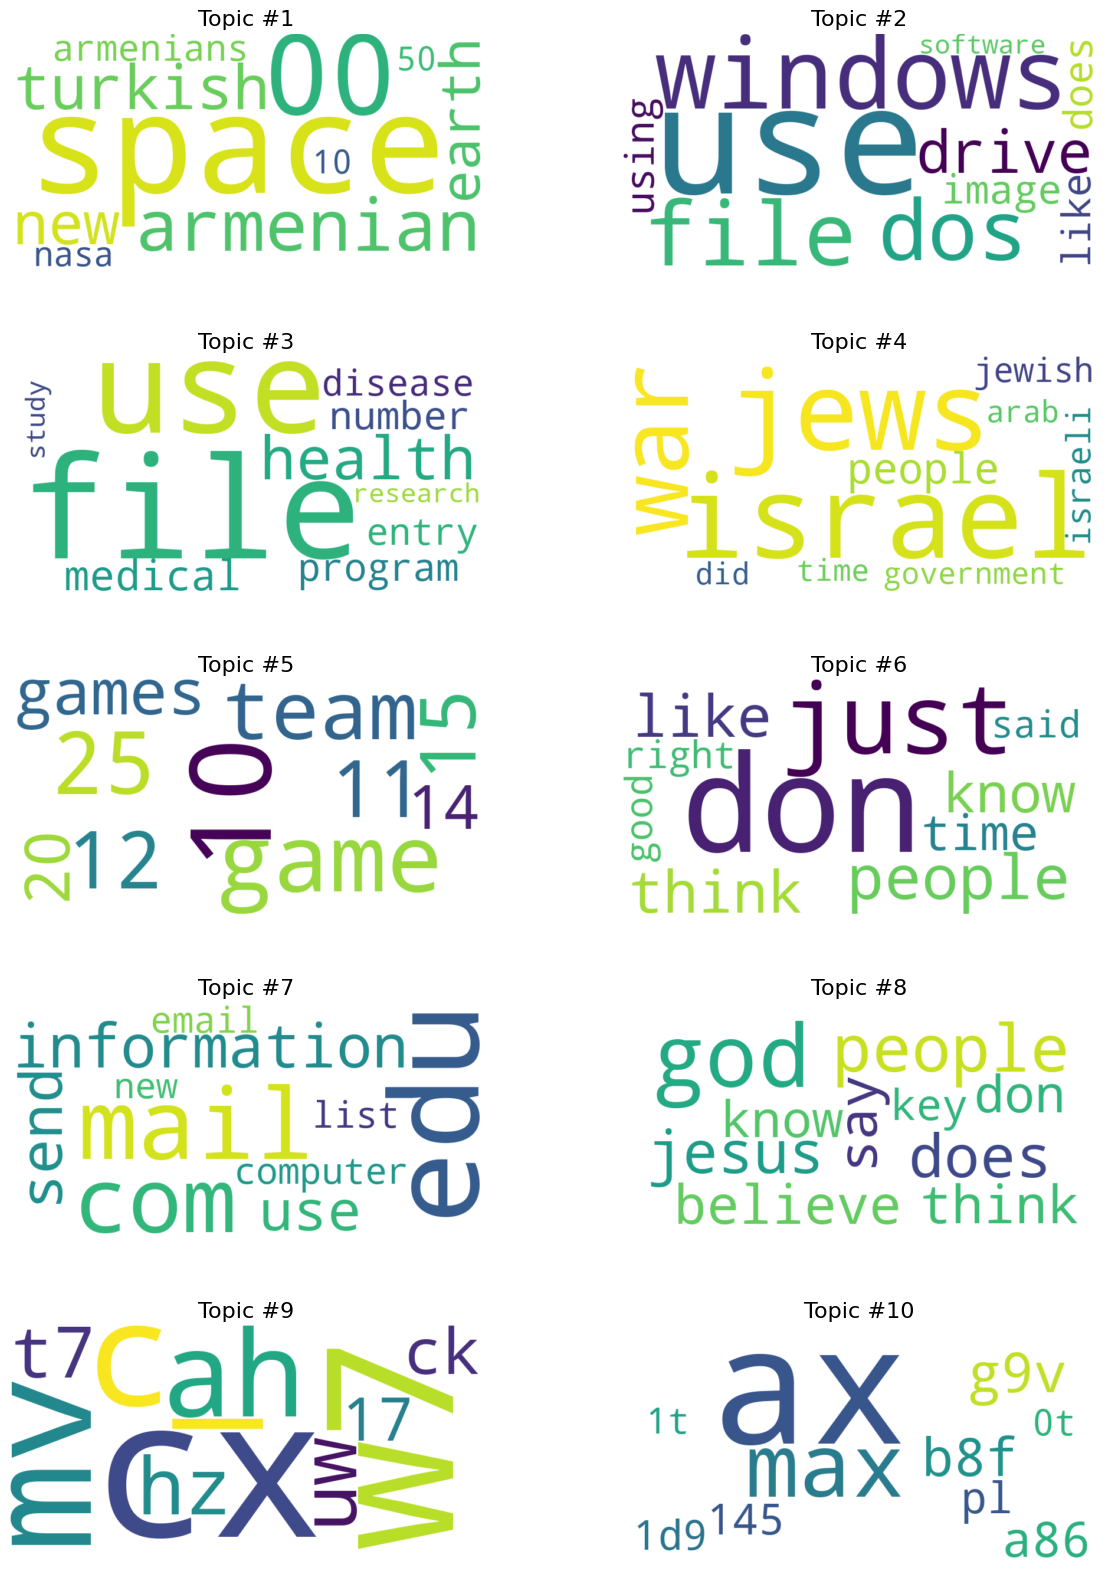

In [8]:
n_top_words = 10
topic_names = vectorizer.get_feature_names_out()

plot_word_clouds(lda, topic_names, n_top_words)

In [9]:
def plot_top_words(model, topic_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 10), sharex=False)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_topic_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [topic_names[i] for i in top_topic_idx]
        weights = topic[top_topic_idx]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx+1}', fontdict={'fontsize': 10})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        
    fig.suptitle(title, fontsize=14)
    plt.subplots_adjust(top=0.90, hspace=0.3)
    plt.show()

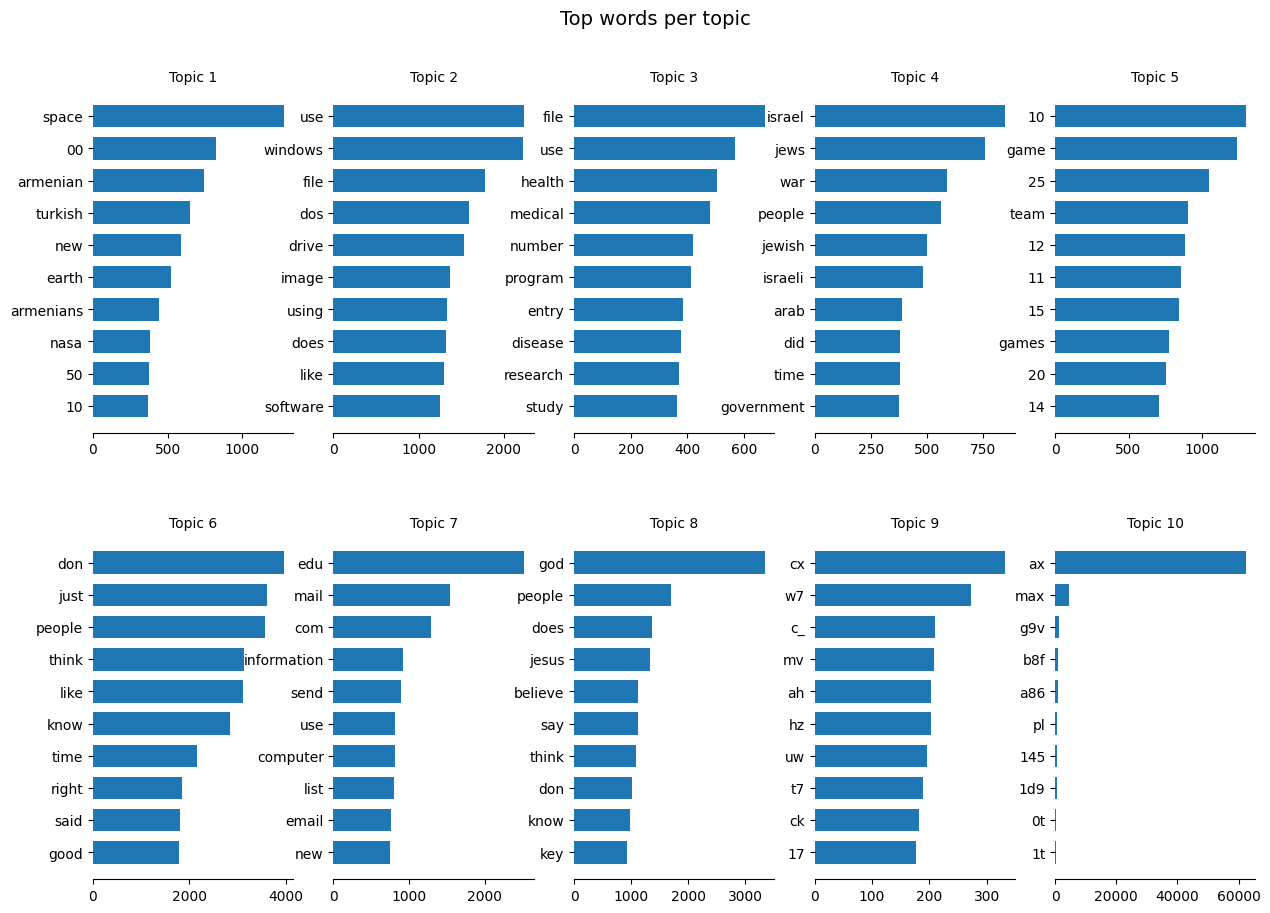

In [10]:
n_top_words = 10
plot_top_words(lda, topic_names, n_top_words, "Top words per topic")

## Topic Distribution Per Document

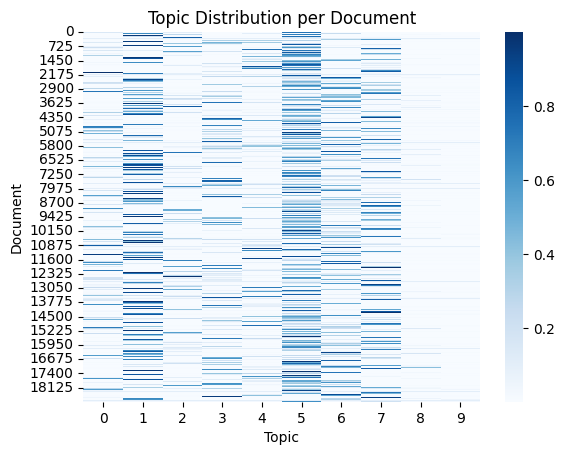

In [11]:
doc_topic_dist = lda.transform(X)
sns.heatmap(doc_topic_dist, cmap="Blues", cbar=True)
plt.title('Topic Distribution per Document')
plt.xlabel('Topic')
plt.ylabel('Document')
plt.show()

## Topic Proportions in the Corpus

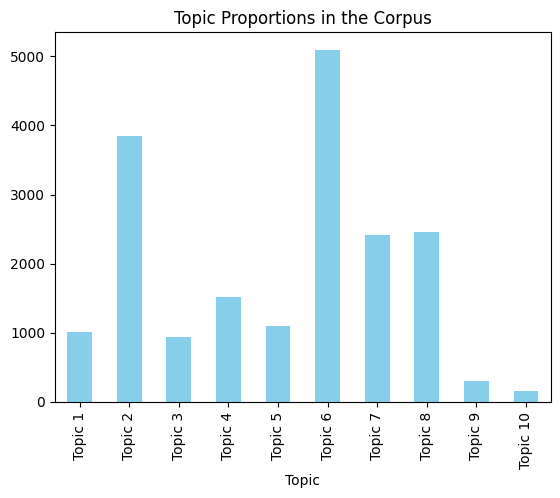

In [12]:
topic_dist = lda.transform(X).sum(axis=0)
topic_labels = [f'Topic {i+1}' for i in range(lda.n_components)]
df = pd.DataFrame({'Topic': topic_labels, 'Proportion': topic_dist})
df.plot(kind='bar', x='Topic', y='Proportion', legend=False, color='skyblue')
plt.title('Topic Proportions in the Corpus')
plt.show()